<a href="https://colab.research.google.com/github/Shravani-std/Deep-Learning/blob/main/Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples= 100, noise = 0.1, random_state=42)


<Axes: >

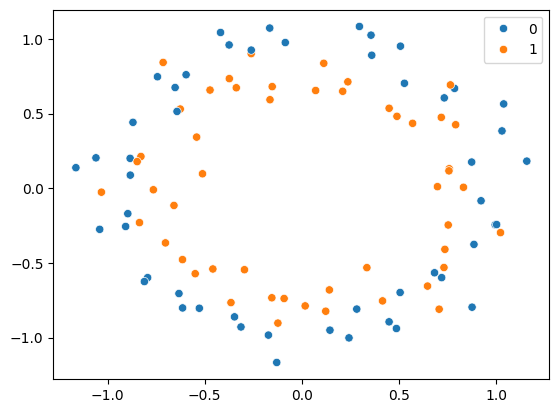

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:, 1] , hue = y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size=0.20, random_state=42)


In [ ]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim = 2))
model.add(Dense(1, activation='relu',))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

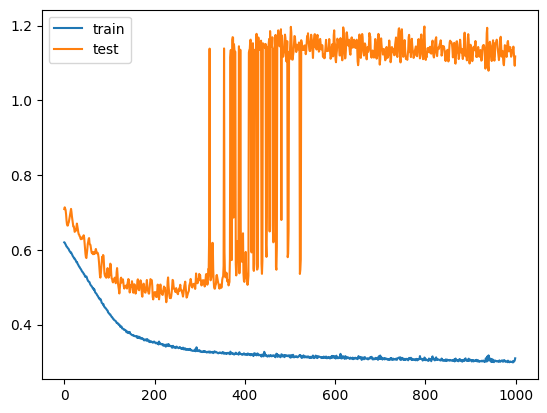

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

Overfitting in above grap orange line

# **Early Stopping**

In [ ]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim = 2))
model.add(Dense(1, activation = 'relu'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta=0.00001,
    patience = 20,
    verbose=1,
    mode =  "auto",
    baseline=None,
    restore_best_weights = False
)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, callbacks= callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.4594 - loss: 7.4591 - val_accuracy: 0.7000 - val_loss: 2.8998
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4437 - loss: 6.5057 - val_accuracy: 0.7000 - val_loss: 1.5309
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4711 - loss: 4.6102 - val_accuracy: 0.7000 - val_loss: 0.7771
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4320 - loss: 3.7337 - val_accuracy: 0.7000 - val_loss: 0.7010
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4437 - loss: 2.6202 - val_accuracy: 0.7000 - val_loss: 0.6683
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4281 - loss: 1.6461 - val_accuracy: 0.7000 - val_loss: 0.6518
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4516 - loss: 1.2124 - val_accuracy: 0.7000 - val_loss: 0.6435
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4750 - loss: 1.0573 - val_accuracy: 0.7000 - 

At 30 Epochs it stopped automatically ans from above will condition of overfitting will occure

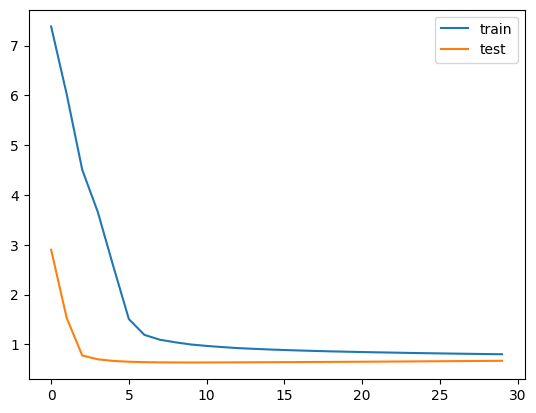

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()